In [1]:
import pandas as pd
import plotly
import plotly.express as px
import plotly.graph_objects as go
import numpy as np

In [2]:
data = pd.read_csv('/content/Data_covid.csv')

In [3]:
data.head()

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018
0,27/3/2020,27,3,2020,0,0,Afghanistan,AF,AFG,37172386.0
1,26/3/2020,26,3,2020,33,0,Afghanistan,AF,AFG,37172386.0
2,25/3/2020,25,3,2020,2,0,Afghanistan,AF,AFG,37172386.0
3,24/3/2020,24,3,2020,6,1,Afghanistan,AF,AFG,37172386.0
4,23/3/2020,23,3,2020,10,0,Afghanistan,AF,AFG,37172386.0


In [4]:
data.shape

(7125, 10)

Nous allons vérifier si nous avons des données manquantes

In [5]:
data.isnull().sum()

dateRep                     0
day                         0
month                       0
year                        0
cases                       0
deaths                      0
countriesAndTerritories     0
geoId                      13
countryterritoryCode       65
popData2018                 7
dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7125 entries, 0 to 7124
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   dateRep                  7125 non-null   object 
 1   day                      7125 non-null   int64  
 2   month                    7125 non-null   int64  
 3   year                     7125 non-null   int64  
 4   cases                    7125 non-null   int64  
 5   deaths                   7125 non-null   int64  
 6   countriesAndTerritories  7125 non-null   object 
 7   geoId                    7112 non-null   object 
 8   countryterritoryCode     7060 non-null   object 
 9   popData2018              7118 non-null   float64
dtypes: float64(1), int64(5), object(4)
memory usage: 556.8+ KB


In [7]:
data.describe(exclude='object')

,day,month,year,cases,deaths,popData2018
count,7125.000000,7125.000000,7125.000000,7125.000000,7125.000000,7.118000e+03
mean,16.522386,2.228912,2019.990596,74.108772,3.322386,7.219029e+07
std,8.225466,1.267308,0.096521,554.117774,31.973060,2.155744e+08
min,1.000000,1.000000,2019.000000,-9.000000,0.000000,1.000000e+03
25%,10.000000,1.000000,2020.000000,0.000000,0.000000,4.403319e+06
50%,17.000000,2.000000,2020.000000,0.000000,0.000000,1.072767e+07
75%,23.000000,3.000000,2020.000000,5.000000,0.000000,5.163526e+07
max,31.000000,12.000000,2020.000000,16797.000000,795.000000,1.392730e+09


In [8]:
data.describe(include='object')

,dateRep,countriesAndTerritories,geoId,countryterritoryCode
count,7125,7125,7112,7060
unique,88,195,194,193
top,27/3/2020,Singapore,CH,JPN
freq,194,88,88,88


In [9]:
nb_total_cas = data.shape[0]
print(f'Le nombre total de cas covid est de {nb_total_cas}')

Le nombre total de cas covid est de 7125


In [15]:
#Nombre total de morts
total_deaths = data['deaths'].sum()
print(f"Le nombre total de mort est: {total_deaths}")

Le nombre total de mort est: 23672


In [14]:
#Nombre total de cas
total_cases = data['cases'].sum()
print(f"Le nombre total de cas est: {total_cases}")

Le nombre total de cas est: 528025


In [13]:
#Nombre totale de morts enregistrés et le ratio entre nombre de morts sur les cas
ratio_deaths_cases = (total_deaths / total_cases)

print(f"Nombre total de cas: {total_cases}")
print(f"Nombre total de morts: {total_deaths}")
print(f"Ratio morts/cas: {ratio_deaths_cases}")

Nombre total de cas: 528025
Nombre total de morts: 23672
Ratio morts/cas: 0.04483121064343544


Création d'un diagramme pour le nombre total de cas par mois

In [17]:
data_cm = data.groupby('month').sum()['cases'].reset_index()
data_cm

,month,cases
0,1,9799
1,2,75377
2,3,442822
3,12,27


In [18]:
bar_fig = px.bar(data_cm,x='month',y='cases', title= "Nombre total de cas par mois")
bar_fig.update_layout(plot_bgcolor='rgba(0,0,0,0)')
bar_fig.show()


Création d'un diagramme pour le nombre total de morts par mois



In [21]:
data_mm = data.groupby('month').sum()['deaths'].reset_index()
data_mm

,month,deaths
0,1,213
1,2,2708
2,3,20751
3,12,0


In [22]:
bar_fig = px.bar(data_mm,x='month',y='deaths', title= "Nombre total de morts par mois")
bar_fig.update_layout(plot_bgcolor='rgba(0,0,0,0)')
bar_fig.show()

Création d'une courbe donnant la tendance des nouveaux cas par jour

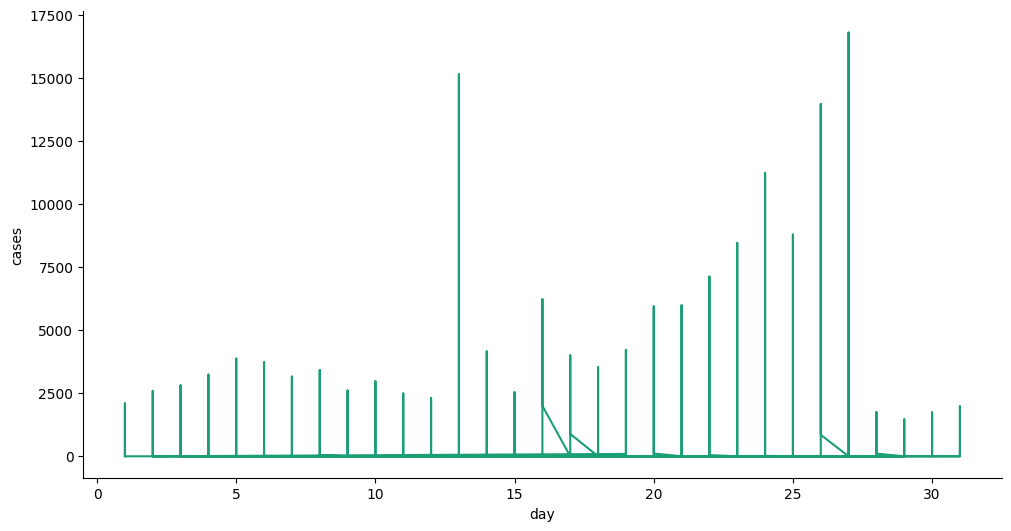

In [25]:
from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['day']
  ys = series['cases']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = data.sort_values('dateRep', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('day')
_ = plt.ylabel('cases')

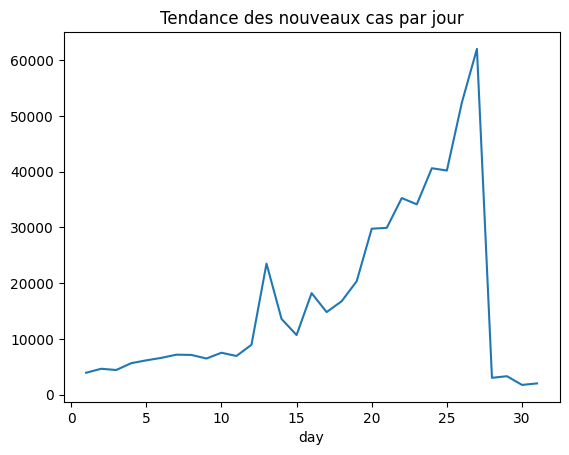

In [33]:
data.groupby('day')['cases'].sum().plot(title='Tendance des nouveaux cas par jour')
plt.show()

Création d'une courbe donnant le cumul des cas par mois

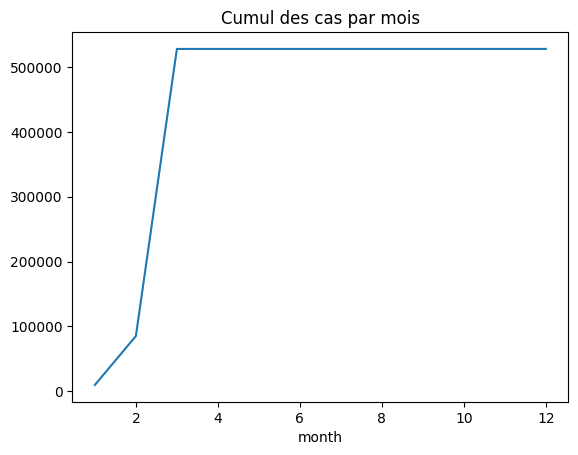

In [34]:
cumul_cases = data.groupby('month')['cases'].sum().cumsum()
cumul_cases.plot(title='Cumul des cas par mois')
plt.show()

Création d'une courbe donnant le cumul des morts par mois

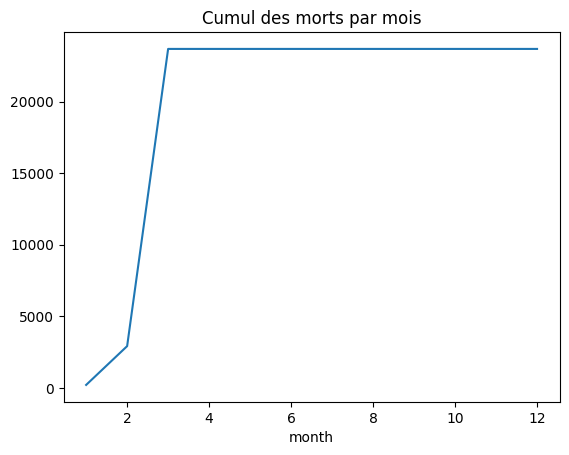

In [35]:
cumul_deaths = data.groupby('month')['deaths'].sum().cumsum()
cumul_deaths.plot(title='Cumul des morts par mois')
plt.show()

Création d'une courbe donnant la tendance des morts par jour

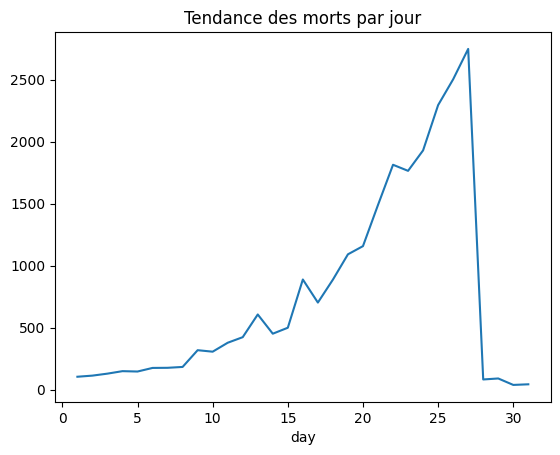

In [36]:
data.groupby('day')['deaths'].sum().plot(title='Tendance des morts par jour')
plt.show()

Top 10 des pays avec le plus de cas

In [37]:
top_10_countries_cases = data.groupby('countriesAndTerritories')['cases'].sum().nlargest(10)
print("Top 10 des pays avec le plus de cas:")
print(top_10_countries_cases)

Top 10 des pays avec le plus de cas:
countriesAndTerritories
United_States_of_America    85991
China                       82079
Italy                       80539
Spain                       56188
Germany                     42288
Iran                        29406
France                      29155
United_Kingdom              11658
Switzerland                 10714
South_Korea                  9332
Name: cases, dtype: int64


 Top 10 des pays avec le plus de morts

In [38]:
top_10_countries_deaths = data.groupby('countriesAndTerritories')['deaths'].sum().nlargest(10)
print("Top 10 des pays avec le plus de morts:")
print(top_10_countries_deaths)

Top 10 des pays avec le plus de morts:
countriesAndTerritories
Italy                       8165
Spain                       4089
China                       3298
Iran                        2234
France                      1696
United_States_of_America    1296
United_Kingdom               578
Netherlands                  434
Germany                      253
Belgium                      220
Name: deaths, dtype: int64
